# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [ ]:
COLLABORATORS = "Nawara Joanna, Śliwa Karol, Kopeć Marta"

---

## Zestaw zadań 1: Generowanie procesów punktowych

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

### Zadanie 1: Proces regularny z komponentem losowym w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `regular_on_rectangle()`, która będzie generować proces regularny z komponentem losowym w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1) Generujemy punkty na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty są oddalone od krawędzi obszaru odpowiednio o $\frac{1}{2} d_x$ w poziomie i $\frac{1}{2}d_y$ w pionie.
2) Do współrzędnych każdego z punktów dodajemy komponent losowy określony wzorem $r \cdot rand$ , gdzie $r$ to parametr określający wielkość komponentu losowego, a $rand$ to wartość wylosowana z rozkładu jednostajnego na przedziale $[-\frac{1}{2} d_x, \frac{1}{2} d_x]$ w przypadku współrzędnej $x$ i na przedziale $[-\frac{1}{2} d_y, \frac{1}{2} d_y]$ w przypadku współrzędnej $y$.

Parametry przykładowego rozkładu:
 - liczba punktów w poziomie: 20
 - liczba punktów w pionie: 10
 - wartość współczynnika określającego siłę komponentu losowego: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10


#### a) Przygotowanie funkcji

In [ ]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    dx = (x_lim[1]-x_lim[0])/grid[0]
    dy = (y_lim[1]-y_lim[0])/grid[1]
    
    x = np.arange(x_lim[0]+dx/2, x_lim[1], dx)
    y = np.arange(y_lim[0]+dy/2, y_lim[1], dy)
    
    xx, yy = np.meshgrid(x, y)
    
    rx = np.random.uniform(-dx/2, dx/2, size = xx.shape[0]*xx.shape[1]) * random_component
    ry = np.random.uniform(-dy/2, dy/2, size = yy.shape[0]*yy.shape[1]) * random_component
    
    new_x = xx.ravel() + rx
    new_y = yy.ravel() + ry
    
    df = {'X' : new_x, 'Y' : new_y}
    df = pd.DataFrame(df)
    return df

#### b) Wygenerowanie procesu

In [ ]:
df = regular_on_rectangle([20,10], 0.5, [0, 20], [0,10])
df.head()

,X,Y
0,0.591303,0.260010
1,1.525643,0.735292
2,2.385258,0.476928
3,3.323076,0.373251
4,4.396277,0.567602


#### c) Wizualizacja

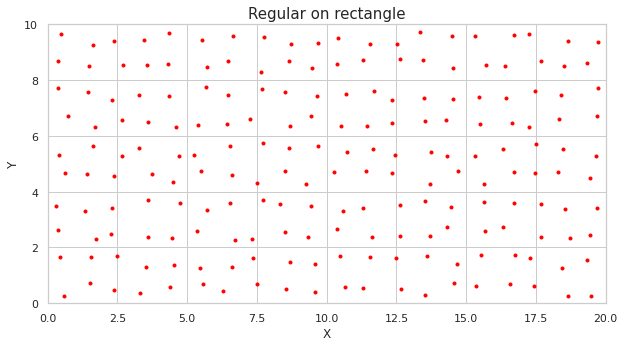

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(df.X, df.Y, marker='.', linestyle='none', color='red')
ax.set_aspect(1)
ax.set_xlim(0, 20)
ax.set_ylim(0,10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.title('Regular on rectangle', {'fontsize': 15})
plt.show()

### Zadanie 2: Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `homogeneous_poisson_on_rectangle()`, która będzie generować jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Losujemy liczbę punktów $n$ z rozkładu Poissona o wartości oczekiwanej równej $i \cdot a$, gdzie $i$ to intensywność procesu, a $a$ jest powierzchnią obszaru, na którym generujemy punkty.
2. Niezależnie od siebie losujemy wartości współrzędnych $n$ punktów z rozkładów jednostajnych na przedziałach określonych przez przyjęte zakresy wartości współrzędnych $x$ i $y$.

Parametry przykładowego rozkładu:
 - intensywność procesu: 10
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [ ]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """ 
    xDelta=x_lim[1]-x_lim[0];
    yDelta=y_lim[1]-y_lim[0];
    areaTotal=xDelta*yDelta;
    
    numbPoints = sp.stats.poisson( intensity*areaTotal ).rvs() 
    x = xDelta*sp.stats.uniform.rvs(0,1,(1, numbPoints))+x_lim[0]
    y = yDelta*sp.stats.uniform.rvs(0,1,(1, numbPoints))+y_lim[0]
    data={'X':x.ravel(), 'Y':y.ravel()}
    return pd.DataFrame(data)

#### b) Wygenerowanie procesu

In [ ]:
df = homogeneous_poisson_on_rectangle(10, [0,20], [0,10])

#### c) Wizualizacja

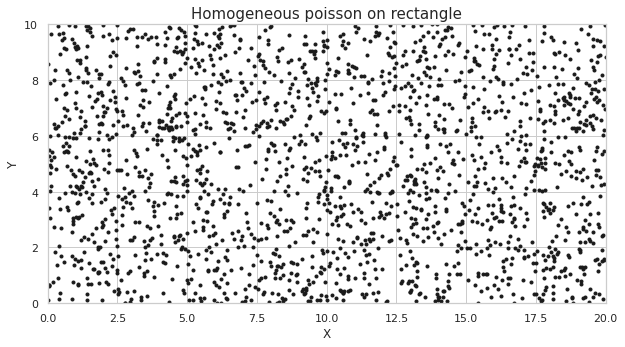

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(df.X, df.Y, marker='.', color='k', linestyle='none')
ax.set_aspect(1)
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.title('Homogeneous poisson on rectangle', {'fontsize': 15})
plt.show()

### Zadanie 3: Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `unhomogeneous_poisson_on_rectangle()`, która będzie generować niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Generujemy punkty z wykorzystaniem jednorodnego procesu Poissona przyjmując intensywność procesu równą maksymalnej wartości jaką osiąga funkcja intensywności w analizowanym obszarze.
2. Przerzedzamy rozkład usuwając z niego punkty z prawdopodobieństwem równym $1-\frac{i}{i_{max}}$, gdzie $i$ to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu, a $i_{max}$ to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru.

Parametry przykładowego rozkładu:
 - intensywność procesu: f(x, y) = x
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [ ]:
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """    
    xMin=x_lim[0];xMax=x_lim[1]; #parametry pomocnicze do uzycia
    yMin=y_lim[0];yMax=y_lim[1];
    xDelta=xMax-xMin;
    yDelta=yMax-yMin;
    areaTotal=xDelta*yDelta;

    #szukanie maximum
    def fun_Neg_intensity(x):
        return -intensity_function(x[0],x[1]); #-f. intensity -> bo bedziemy szukac minimum zamiast maximum

    xy0=[(xMin+xMax)/2,(yMin+yMax)/2]; #poczatkowa wartosc - srodek
    
    #max intensity
    minimizeRes=sp.optimize.minimize(fun_Neg_intensity, xy0, bounds=((xMin, xMax), (yMin, yMax)));
    intensityNegMin=minimizeRes.fun; #minimum z funkcji minimize
    intensityMax=-intensityNegMin; #minimum

    #jednorodny poisson
    numbPoints = np.random.poisson(intensityMax*areaTotal);#ile punktow
    xx = np.random.uniform(0,xDelta,((numbPoints,1)))+xMin;
    yy = np.random.uniform(0,yDelta,((numbPoints,1)))+yMin;
    
    
    #x,y i przerzedzanie  
    p=intensity_function(xx,yy)/intensityMax; #i_punktu/i_max
    thinnedPoints=np.random.uniform(0,1,((numbPoints,1)))<p;

    #x i y ktore zatrzymujemy
    xx=xx[thinnedPoints]; 
    yy=yy[thinnedPoints];
    data={'X':xx.ravel(), 'Y':yy.ravel()}
    return pd.DataFrame(data);
    

#### b) Wygenerowanie procesu

In [ ]:
def intensity_function (X,Y):
    #return X**(1/2)+Y**2;
    return X

df=unhomogeneous_poisson_on_rectangle(intensity_function, [0,20], [0,10])
df.head()

,X,Y
0,18.519618,2.054454
1,18.644716,7.222240
2,1.549219,4.566229
3,15.578453,8.237613
4,19.713085,8.342913


#### c) Wizualizacja

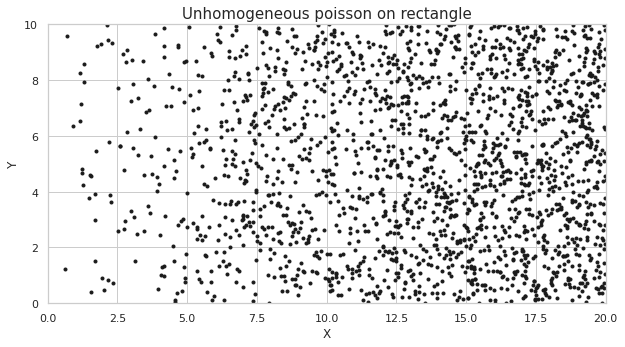

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(df.X, df.Y, marker='.', color='k', linestyle='none')
ax.set_aspect(1)
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.title('Unhomogeneous poisson on rectangle', {'fontsize': 15})
plt.show()

### Zadanie 4: Proces punktowy Matérna w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `materna_on_rectangle()`, która będzie generować proces punktowy Materna w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor równy wartości parametru `cluster_radius`.
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Wokół każdego z wygenerowanych punktów (okrąg o promieniu równym wartości parametru `cluster_radius`) generujemy punkty z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `daughter_intensity`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - intensywność procesu potomnego: 10
 - promień klastra: 1
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [ ]:
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    
    # Extended simulation windows parameters
    x_lim_new = [x_lim[0]-cluster_radius, x_lim[1]+cluster_radius]
    y_lim_new = [y_lim[0]-cluster_radius, y_lim[1]+cluster_radius]
    
    # Simulate Poisson point process for the parents
    parent_points =  homogeneous_poisson_on_rectangle(parent_intensity, x_lim_new, y_lim_new)
    num_parent = len(parent_points)
    
    # Number of daughters points per cluster
    circle_area = np.pi*cluster_radius**2
    num_daughter = sp.stats.poisson( daughter_intensity*circle_area ).rvs()
    
    total_number = num_parent * num_daughter
    
    # Generate polar variables
    r = cluster_radius * np.sqrt(np.random.uniform(0, 1, total_number));
    angle = 2 * np.pi * np.random.uniform(0, 1, total_number);
    
    # Convert from polar to Cartesian coordinates
    daughter_x = r * np.cos(angle)
    daughter_y = r * np.sin(angle)
    
    # Replicate parents
    parent_x = np.repeat(parent_points.X, num_daughter)
    parent_y = np.repeat(parent_points.Y, num_daughter)
    
    # Translate points
    new_x = parent_x + daughter_x
    new_y = parent_y + daughter_y
    
    # Accept points inside the simulation window
    insideWindow = ((new_x >= x_lim[0]) & (new_x <= x_lim[1]) & (new_y >= y_lim[0]) & (new_y <= y_lim[1]))
    new_x = new_x[insideWindow]
    new_x.reset_index(inplace=True, drop=True)
    new_y = new_y[insideWindow]
    new_y.reset_index(inplace=True, drop=True)
    
    # Pass data to the DataFrame
    data = {'X': new_x, 'Y': new_y}
    data = pd.DataFrame(data)
    
    return data
    

#### b) Wygenerowanie procesu

In [ ]:
df = materna_on_rectangle(0.2, 10, 1, [0,20], [0,10])


,X,Y
0,0.540949,3.246322
1,0.497324,2.765419
2,0.655448,4.163908
3,0.318545,3.769250
4,1.060210,3.408855
...,...,...
1238,15.253428,6.352158
1239,16.095186,6.611107
1240,16.078136,6.464845
1241,15.695401,6.197609


#### c) Wizualizacja

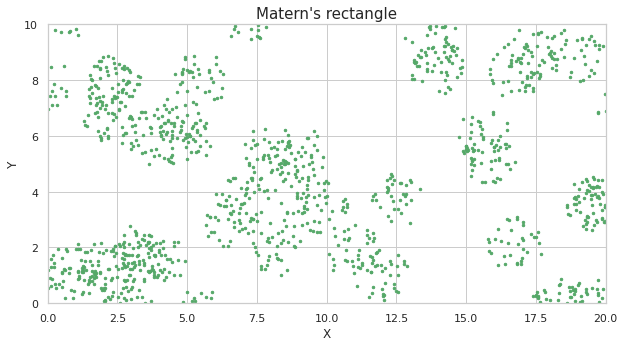

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(df.X, df.Y, s = 6, edgecolor='g', facecolor='g')
ax.set_aspect(1)
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.title("Matern's rectangle", {'fontsize': 15})
plt.show()

### Zadanie 5: Proces punktowy Thomasa w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `thomas_on_rectangle()`, która będzie generować proces punktowy Thomasa w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor, którego wielkość jest zależna od wartości parametru `cluster_sigma` (na potrzeby zadania przyjmijmy 4-krotność wartości tego parametru).
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Dla każdego z wygenerowanych punktów (centrów klastrów):
    - Losujemy liczbę punktów znajdujących się w obrębie danego klastra $n_c$ z rozkładu Poissona o wartości oczekiwanej równej wartości parametru `mean_cluster_size`.
    - Niezależnie od siebie losujemy wartości współrzędnych $n_c$ punktów z rozkładów normalnych o wartości oczekiwanej równej współrzędnej punktu stanowiącego centrum klastra i odchyleniu standardowym równym wartości parametru `cluster_sigma`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - średnia liczebność klastra: 30
 - odchylenie standardowe klastra: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [ ]:
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    bb = cluster_sigma*4
    x_lim_new = [x_lim[0]-bb, x_lim[1]+bb]
    y_lim_new = [y_lim[0]-bb, y_lim[1]+bb]
    xDeltaExt = x_lim_new[1] - x_lim_new[0];
    yDeltaExt = y_lim_new[1] - y_lim_new[0];
    areaTotalExt = xDeltaExt * yDeltaExt;  # area of extended rectangle

    # Simulate Poisson point process for the parents
    numbPointsParent =  homogeneous_poisson_on_rectangle(parent_intensity, x_lim_new, y_lim_new)
    #numbPointsParent = str(numbPointsParent)
    npp  = len(numbPointsParent)

    # x and y coordinates of Poisson points for the parent
    xxParent = x_lim_new[0] + xDeltaExt * np.random.uniform(0, 1, npp);
    yyParent = y_lim_new[0] + yDeltaExt * np.random.uniform(0, 1, npp);
    
    # Simulate Poisson point process for the daughters (ie final poiint process)
    numbPointsDaughter = np.random.poisson(mean_cluster_size, npp);
    numbPoints = sum(numbPointsDaughter);  # total number of points

    # Generate the (relative) locations in Cartesian coordinates by simulating independent normal variables
    xx0 = np.random.normal(0, cluster_sigma, numbPoints);  # (relative) x coordinaets
    yy0 = np.random.normal(0, cluster_sigma, numbPoints);  # (relative) y coordinates

    # replicate parent points (ie centres of disks/clusters)
    xx = np.repeat(xxParent, numbPointsDaughter);
    yy = np.repeat(yyParent, numbPointsDaughter);

    # translate points (ie parents points are the centres of cluster disks)
    xx = xx + xx0;
    yy = yy + yy0;

    # thin points if outside the simulation window
    booleInside = ((xx >= x_lim[0]) & (xx <= x_lim[1]) & (yy >= y_lim[0]) & (yy <= y_lim[1]));
    # retain points inside simulation window
    xx = xx[booleInside];  
    yy = yy[booleInside];
    
    # Pass data to the DataFrame
    data = {'X': xx, 'Y': yy}
    data = pd.DataFrame(data)
    
    return data

#### b) Wygenerowanie procesu

In [ ]:
# YOUR CODE HERE
df = thomas_on_rectangle(0.2, 30, 0.5, [0,20], [0,10])

#### c) Wizualizacja

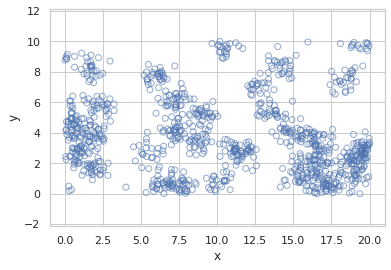

In [ ]:
# YOUR CODE HERE
plt.scatter(df.x,df.y, edgecolor='b', facecolor='none', alpha=0.6);
plt.xlabel("x");
plt.ylabel("y");
plt.axis('equal');
plt.show()